In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('labeledTrainData.tsv',delimiter='\t',quoting=3)

In [3]:
data=data[0:1000]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   object
 1   sentiment  1000 non-null   int64 
 2   review     1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [5]:
data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [6]:
import re
import nltk

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SHELENDRA
[nltk_data]     VASHISHTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
corpus=[]

In [10]:
stops = stopwords.words('english')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   object
 1   sentiment  1000 non-null   int64 
 2   review     1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233AAF32688>]],
      dtype=object)

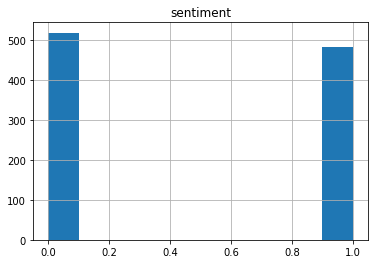

In [12]:
data.hist()

In [13]:
stops.remove('don')
stops.remove("don't")
stops.remove('aren')
stops.remove("aren't")
stops.remove('couldn')
stops.remove("couldn't")
stops.remove('didn')
stops.remove("didn't")
stops.remove('doesn')
stops.remove("doesn't")
stops.remove('hadn')
stops.remove("hadn't")
stops.remove('hasn')
stops.remove("hasn't")
stops.remove('haven')
stops.remove("haven't")
stops.remove('isn')
stops.remove("isn't")
stops.remove('mightn')
stops.remove("mightn't")
stops.remove('mustn')
stops.remove("mustn't")
stops.remove('needn')
stops.remove("needn't")
stops.remove('shan')
stops.remove("shan't")
stops.remove('shouldn')
stops.remove("shouldn't")
stops.remove('wasn')
stops.remove("wasn't")
stops.remove('weren')
stops.remove("weren't")
stops.remove('won')
stops.remove("won't")
stops.remove('wouldn')
stops.remove("wouldn't")
stops.remove('no')
stops.remove('nor')
stops.remove('not')

In [14]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

In [15]:
for i in range(1000):
  rev = re.sub('[^a-zA-Z]',' ',data['review'][i])
  rev = rev.lower()
  rev = rev.split()
  ps = PorterStemmer()
  rev = [ps.stem(word) for word in rev if not word in set(stops)]
  rev =' '.join(rev)
  corpus.append(rev)

In [16]:
corpus

['stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one leve

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=12700)
X = cv.fit_transform(corpus).toarray()

In [23]:
y=data.iloc[:,1].values

In [22]:
len(X[0])

12700

In [24]:
y

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
from sklearn.linear_model import LogisticRegression
lgsr = LogisticRegression()

In [35]:
lgsr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pre = lgsr.predict(X_test)

In [28]:
y_pred = gnb.predict(X_test)

In [29]:
from sklearn import metrics

In [36]:
metrics.accuracy_score(y_train,lgsr.predict(X_train))

1.0

In [38]:
metrics.accuracy_score(y_test,y_pre)

0.844

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[81, 45],
       [48, 76]], dtype=int64)

In [39]:
X_train.shape

(750, 12700)

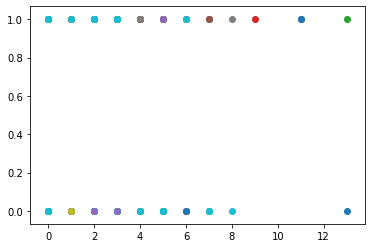

In [42]:
for i in range(750):
    plt.scatter(X_train[:,i],y_train)

In [43]:
from sklearn.svm import SVC

In [44]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pr = svc.predict(X_test)

In [46]:
confusion_matrix(y_test,y_pr)

array([[86, 40],
       [45, 79]], dtype=int64)

In [47]:
metrics.accuracy_score(y_test,y_pr)

0.66

In [49]:
correlations = data.corr(method='pearson')

In [50]:
correlations

,sentiment
sentiment,1.0


In [51]:
skew = data.skew()

In [52]:
skew


sentiment    0.072155
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233B258F3C8>,
      dtype=object)

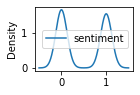

In [56]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)

sentiment    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

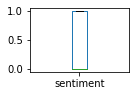

In [57]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)


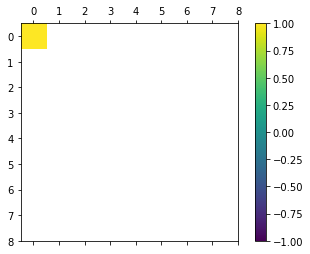

In [59]:
from matplotlib import pyplot
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233BC263B08>]],
      dtype=object)

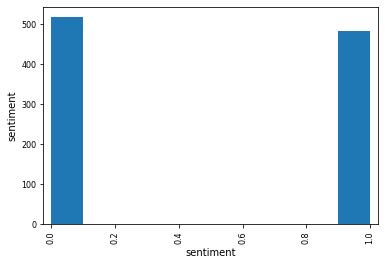

In [60]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [69]:
metrics.accuracy_score(y_test,knn.predict(X_test))

0.564

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [78]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
metrics.accuracy_score(y_test,dtc.predict(X_test))

0.624

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
metrics.accuracy_score(y_test,rfc.predict(X_test))

0.776